In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Define dataset path
dataset_path = r"C:\Users\HP\Downloads\carLogoDataset\logo findder"  # Make sure your images are structured correctly

224 × 224 × 3 → RGB (3 color channels).
224 × 224 × 1 → Grayscale (1 channel).
255 is just for normalization, so pixel values stay between 0 and 1, improving model performance.

In [3]:
# Define parameters
img_size = (224, 224)  # Resize all images to 224x224
batch_size = 32
num_classes = 2  # Update this based on the number of companies

In [4]:

# Load dataset from directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

Found 55 files belonging to 2 classes.
Using 44 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 55 files belonging to 2 classes.
Using 11 files for validation.


In [6]:
# Normalize the images (scale pixel values to [0,1])
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [7]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

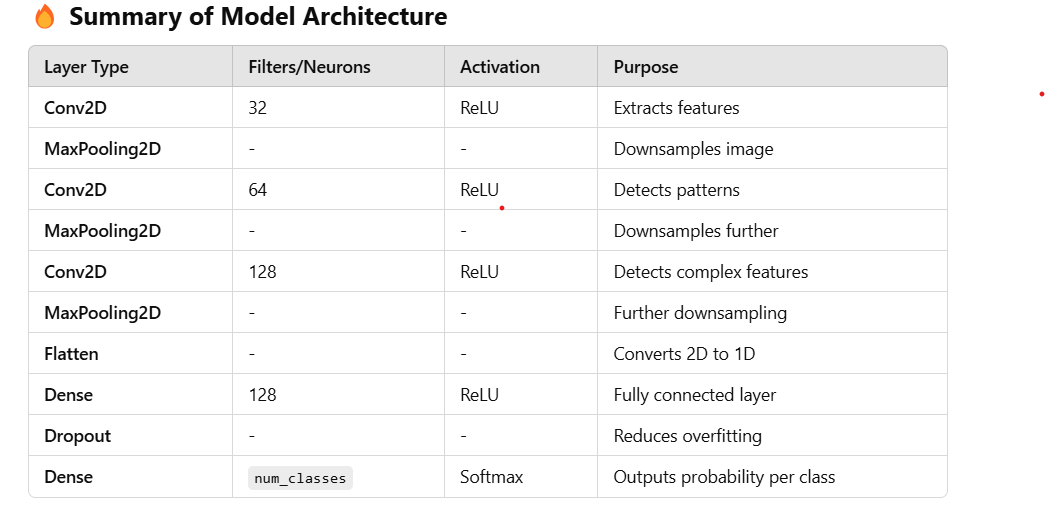

In [8]:
# CNN Model
def create_cnn_model():
    model = keras.Sequential([
        data_augmentation,  # Data augmentation layer
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Multi-class classification
    ])
    return model

In [9]:
# Compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\HP\Desktop\streamlit\CNN\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
epochs = 100  # Adjust based on dataset size
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5407 - loss: 1.3427 - val_accuracy: 0.5455 - val_loss: 1.9813
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4848 - loss: 1.2428 - val_accuracy: 0.7273 - val_loss: 0.5106
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7348 - loss: 0.5747 - val_accuracy: 0.8182 - val_loss: 0.2712
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8627 - loss: 0.4084 - val_accuracy: 1.0000 - val_loss: 0.2299
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7955 - loss: 0.3699 - val_accuracy: 0.8182 - val_loss: 0.3281
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8011 - loss: 0.3592 - val_accuracy: 1.0000 - val_loss: 0.1504
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9081 - loss: 0.3485 - val_accuracy: 1.0000 - val_loss: 0.2465
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9081 - loss: 0.3277 - val_accuracy: 1.0000 - val_loss: 0.2271
Epoch 

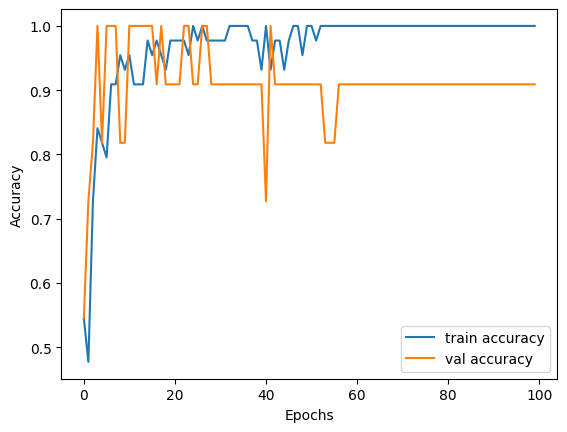

In [11]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
# Save the model
model.save("logo_classifier_model.h5")

print("Model training complete and saved as logo_classifier_model.h5")

Model training complete and saved as logo_classifier_model.h5


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("logo_classifier_model.h5")

# Define class labels (update based on your dataset folders)
#class_labels = ['Original Ferrari logo', 'Original Ford  logo']  # Modify as needed
class_labels = ['Original Ford  logo','Original Ferrari logo']  # Modify as needed


# Function to preprocess and predict an image
def predict_logo(img_path):
    img_size = (224, 224)  # Same as training image size
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    img_array /= 255.0  # Normalize (same as training)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Get index of highest probability
    confidence = np.max(predictions[0])  # Get confidence score

    # Print result
    print(f"Predicted Logo: {class_labels[predicted_class]} (Confidence: {confidence:.2f})")
    return class_labels[predicted_class], confidence

# Example usage
image_path = r"C:\Users\HP\Downloads\Mark-Webber-invoice_3010604.jpg"  # Change to your image path
predict_logo(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted Logo: Original Ferrari logo (Confidence: 1.00)


('Original Ferrari logo', np.float32(0.99983454))

In [16]:
import os
class_labels = sorted(os.listdir(dataset_path))  
print("Class labels (order used by model):", class_labels)

Class labels (order used by model): ['Original Ferrari logo', 'Original Ford  logo']


In [22]:
from PIL import Image
import os

# Path to the folder containing images
folder_path = r"C:\Users\HP\Desktop\streamlit\CNN\testimages"
output_folder = os.path.join(folder_path, r"C:\Users\HP\Desktop\streamlit\CNN\convertedJPGs")  # Save JPGs here

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Convert images to JPG
for filename in os.listdir(folder_path):
    if filename.lower().endswith((".png", ".jpeg", ".bmp", ".tiff", ".webp")):  # Add more if needed
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert("RGB")  # Convert to RGB (JPG format)
        
        # Save as JPG with same name
        jpg_filename = os.path.splitext(filename)[0] + ".jpg"
        jpg_path = os.path.join(output_folder, jpg_filename)
        img.save(jpg_path, "JPEG")
        print(f"Converted: {filename} → {jpg_filename}")

print("✅ Conversion complete! JPGs saved in:", output_folder)


Converted: am-i-being-ripped-off-by-the-dealer-v0-jwbsya3o5ncc1.webp → am-i-being-ripped-off-by-the-dealer-v0-jwbsya3o5ncc1.jpg
Converted: fki3vawi60ftcxhmftinfclpymza.webp → fki3vawi60ftcxhmftinfclpymza.jpg
Converted: ford-logo-cover.webp → ford-logo-cover.jpg
✅ Conversion complete! JPGs saved in: C:\Users\HP\Desktop\streamlit\CNN\convertedJPGs


In [42]:
from huggingface_hub import InferenceClient
import os
from dotenv import load_dotenv

# Load API key from .env file (Optional, or set manually below)
load_dotenv()
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")

# If not using .env, set your API key here directly
#HUGGINGFACE_API_KEY = "your_huggingface_api_key_here"

# Set up Hugging Face API client
client = InferenceClient(model="google/gemma-2-27b-it", token=HUGGINGFACE_API_KEY)

# Function to send a query to Gemma API
def generate_response(prompt):
    response = client.text_generation(prompt, max_new_tokens=200)
    return response

# Example usage
user_query = "who is sachin give me in 9 lines?"
response = generate_response(user_query)
print("Gemma Response:", response)


Gemma Response: 

Sachin Tendulkar, often hailed as the "God of Cricket," is a retired Indian cricketer widely regarded as one of the greatest batsmen of all time.

Born in Mumbai, India, on April 24, 1973, he made his international debut at the age of 16.

Tendulkar holds numerous records, including the most runs and centuries in both Test and One Day International cricket.

His elegant strokeplay, exceptional technique, and unwavering determination captivated fans worldwide.

He played a pivotal role in India's 2011 World Cup victory, fulfilling a lifelong dream.

Tendulkar retired from international cricket in 2013, leaving behind a legacy that continues to inspire generations of cricketers.

His humility, sportsmanship, and dedication to the game earned him immense respect and admiration.

Beyond cricket, Tendulkar is involved in philanthropic activities and promotes various social causes.

He remains a national icon
